In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv


road_data_uncut = pd.read_csv("LAB6_Road.csv")
outdoor_data_uncut = pd.read_csv("LAB6_outdoors.csv")
road_data = road_data_uncut[1:]
outdoor_data = outdoor_data_uncut[127:]




#### Temperature vs humidity
- NOTE: These were taken by the same sensor at the same time, so each measurement matches up in time, meaning plotting one versus the other works. 
- What is the hidden variable that is important when making plots like this?

What does this plot show? Are temperature and humidity correlated? How would you quantify this?
- HINT: there are linear correlation comparisons you can make mathematically such as the Pearson's correlation or similar (linear $R^2$), is the correlation you are seeing linear? Can you implement these in code?

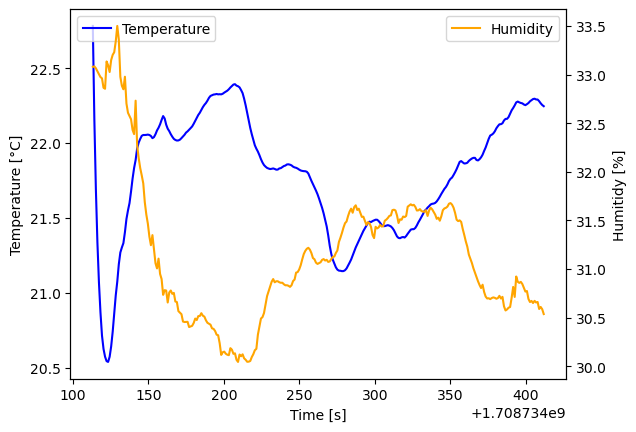

In [76]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(road_data["Time"], road_data["Temperature"], label = "Temperature", color = "blue")
ax2.plot(road_data["Time"], road_data["Humidity"], label = "Humidity", color = "orange")
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Temperature [°C]")
ax2.set_ylabel("Humitidy [%]")
ax1.legend(loc=2)
ax2.legend(loc=1)
plt.show()

In [55]:
road_data.corr(method='pearson', min_periods=1, numeric_only=False)

,Time,PM2.5,PM10,Temperature,Gas,Humidity,Pressure,Altitude
Time,1.000000,0.033779,-0.141893,0.093106,0.916215,-0.250849,-0.329980,0.329973
PM2.5,0.033779,1.000000,0.883681,-0.090178,-0.048524,0.083189,0.063060,-0.063075
PM10,-0.141893,0.883681,1.000000,0.056642,-0.152735,-0.067158,-0.046080,0.046076
Temperature,0.093106,-0.090178,0.056642,1.000000,0.161097,-0.732056,-0.094795,0.094805
Gas,0.916215,-0.048524,-0.152735,0.161097,1.000000,-0.482515,-0.613207,0.613202
Humidity,-0.250849,0.083189,-0.067158,-0.732056,-0.482515,1.000000,0.640865,-0.640875
Pressure,-0.329980,0.063060,-0.046080,-0.094795,-0.613207,0.640865,1.000000,-1.000000
Altitude,0.329973,-0.063075,0.046076,0.094805,0.613202,-0.640875,-1.000000,1.000000


- The plot clearly shows that temperature and humidity are inversely proportional. Warm air is capable of contanining more water vapor than cold air. Assuming a constant amount of water vapor / absolute humidity, the higher the temperature is, the lower the relative humidity, which is the one measured, will be.
- The above correlation function is built-in in pandas and computes the Pearson correlation matrix for all columns of the matrix, where 0 is no correlation, 1 a perfect linear correlation and -1 a perfectly inversely proportional correlation.
- The linear correlation coefficient for Temperature and Humidity is -0.732, which clearly supports the assumption of an inversely proportional relationship.

#### Temperature vs all other properties
- Plot temperature vs another property measured by that sensor, are they correlated? Is the correlation qualitatively similar to what you see from temperature vs humidity?
- Try this for all data types (temp. vs pressure, temp. vs voc, etc.)

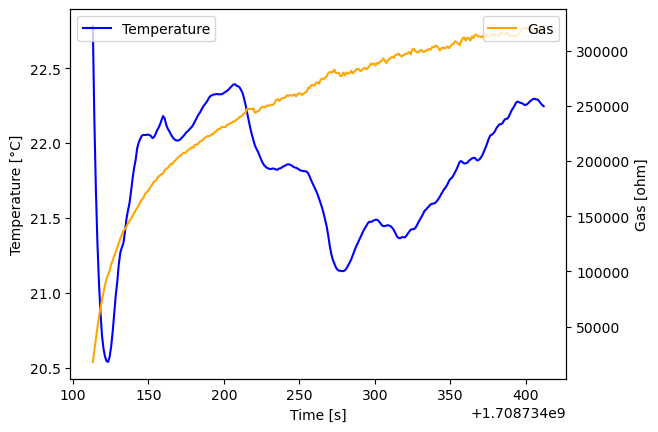

In [78]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(road_data["Time"], road_data["Temperature"], label = "Temperature", color = "blue")
ax2.plot(road_data["Time"], road_data["Gas"], label = "Gas", color = "orange")
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Temperature [°C]")
ax2.set_ylabel("Gas [ohm]")
ax1.legend(loc=2)
ax2.legend(loc=1)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


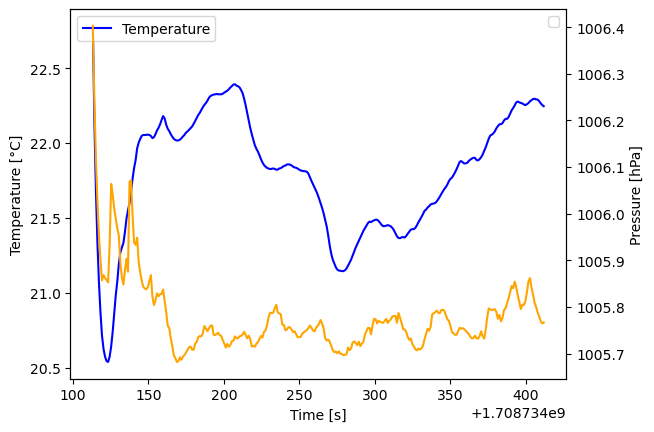

In [79]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(road_data["Time"], road_data["Temperature"], label = "Temperature", color = "blue")
ax2.plot(road_data["Time"], road_data["Pressure"], label = "", color = "orange")
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Temperature [°C]")
ax2.set_ylabel("Pressure [hPa]")
ax1.legend(loc=2)
ax2.legend(loc=1)
plt.show()

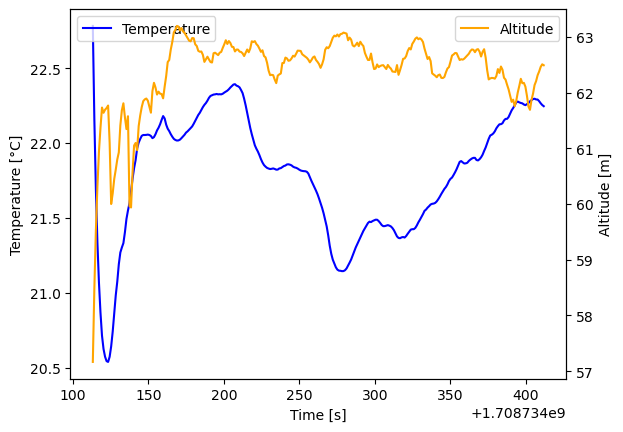

In [80]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(road_data["Time"], road_data["Temperature"], label = "Temperature", color = "blue")
ax2.plot(road_data["Time"], road_data["Altitude"], label = "Altitude", color = "orange")
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Temperature [°C]")
ax2.set_ylabel("Altitude [m]")
ax1.legend(loc=2)
ax2.legend(loc=1)
plt.show()

- The above graphs do not indicate any further correlations.
- This is further supported by the Pearson correlation test data from before. The correlation coefficient is 0.161 for Temperature vs. Gas and ranges between 0.90 and 0.95 for all other comparisons with Temperature. This indicates no linear correlation being present.
- Extra: The correlation between Pressure and Altitude is perfectly inversely proportional with a coefficient of -1, which indicates that both are computed from the same raw sensor data.

#### Temperature vs PM2.5
- Plot temperature vs PM2.5 concentration and discuss as with the previous comparisons.
- This will require coming up with a way to ensure that the times match between sensors, what about the way you are collecting data ensures that this is true?

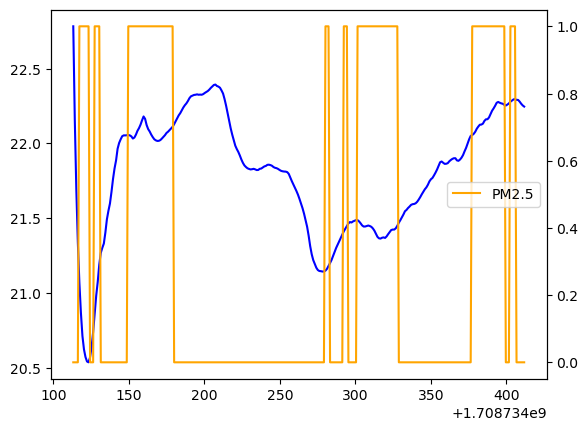

In [59]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(road_data["Time"], road_data["Temperature"], label = "Temperature", color = "blue")
ax2.plot(road_data["Time"], road_data["PM2.5"], label = "PM2.5", color = "orange")
plt.legend()
plt.show()

- PM2.5 can unfortunately not be compared with Temperature, as the PM sensor only gave very low readings of 0 or 1. This could be caused by the specific sensor used, as the sensor used the week before output measurements in a somewhat larger range.
- The time matches between the two sensors, as their datapoints were each saved at the same time by the script.